In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\shoum\Downloads\Virtual_Competition\train_v9rqX0R.csv")

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis

In [4]:
data.shape

(8523, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
data.isna().sum() / data.shape[0] * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [11]:
##Item identifier is just identification numbers so not going to be helpful in ML model
## we can drop it

In [12]:
data['Item_Identifier'].nunique()     #label encode

1559

In [13]:
data['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [14]:
data['Item_Fat_Content'].unique()   # One hot

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [15]:
data['Item_Type'].nunique()   # Label Encode

16

In [16]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [17]:
data['Outlet_Identifier'].nunique()   #Label Encode

10

In [18]:
data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [19]:
data['Outlet_Size'].nunique()

3

In [20]:
data['Outlet_Size'].unique()   #one hot

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [21]:
data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [22]:
data['Outlet_Location_Type'].nunique()

3

In [23]:
data['Outlet_Location_Type'].unique()  # one hot

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [24]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

# PREPROCESSING

# Missing values Handling

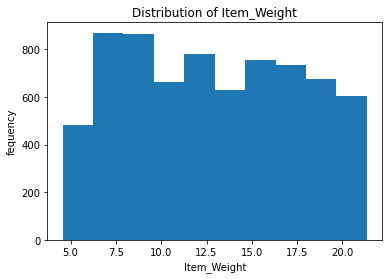

In [25]:
plt.hist(data['Item_Weight'])
plt.title('Distribution of Item_Weight')
plt.xlabel('Item_Weight')
plt.ylabel('fequency')
plt.show()

In [26]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
#not a normal distribution so we need to fill with median

In [28]:

data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].median())

#Filling the na values (null values) of Item_Weight' column with the median value of 'Item_Weight'

In [29]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [30]:
data['Outlet_Size'].mode()[0]

'Medium'

In [31]:
#Filling Outlet_Size with mode

data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [32]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Correlation

<AxesSubplot:>

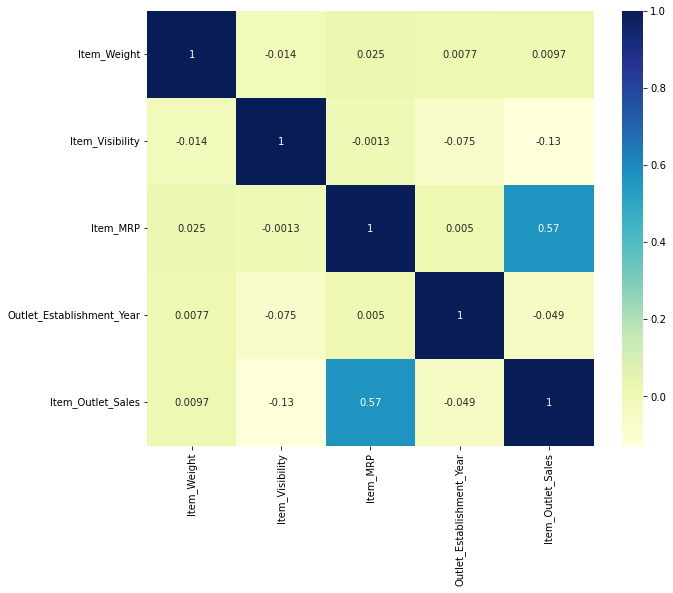

In [33]:
### correlation matrix

corrmatrix = data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix, annot=True, cmap='YlGnBu')

<AxesSubplot:>

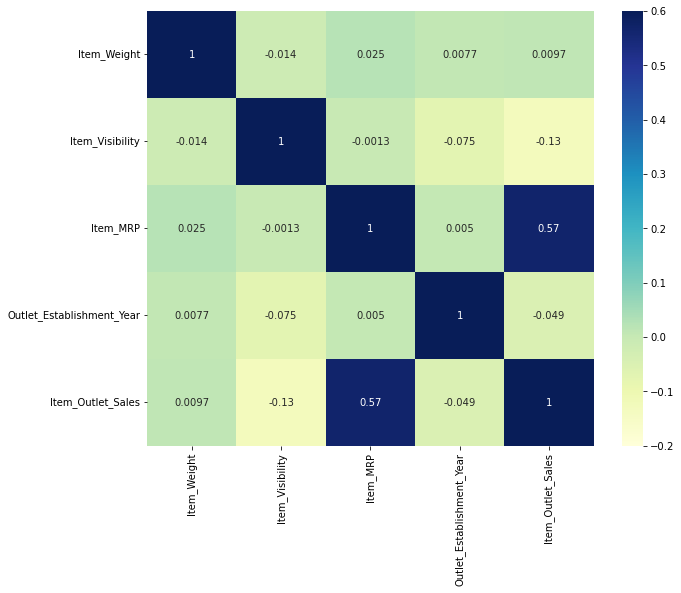

In [34]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix, vmin=-.2, vmax=.6, annot=True, cmap='YlGnBu')

In [35]:
#Sales is correlated with MRP and outlet 

# Splitting into features and target

In [36]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [37]:
#   X = data.drop('Item_Identifier','Outlet_Identifier','Item_Outlet_Sales', axis=1)  #taking features into X

X = data.drop(['Item_Identifier','Item_Outlet_Sales'], axis=1)  # taking features into X

y = data['Item_Outlet_Sales']              # taking the target into y


# Scaling - Min max

In [38]:
X1 = X.drop(['Item_Fat_Content','Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], axis=1)

# taking only columns needed for scaling

In [40]:
X1.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')

In [41]:
X1.dtypes

Item_Weight        float64
Item_Visibility    float64
Item_MRP           float64
dtype: object

In [42]:
X1.describe()

,Item_Weight,Item_Visibility,Item_MRP
count,8523.00000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782
std,4.22724,0.051598,62.275067
min,4.55500,0.000000,31.290000
25%,9.31000,0.026989,93.826500
50%,12.60000,0.053931,143.012800
75%,16.00000,0.094585,185.643700
max,21.35000,0.328391,266.888400


In [43]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [44]:
X1 = min_max_scaler.fit_transform(X1)

In [46]:
X1.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [47]:
X1 = pd.DataFrame(X1, columns=['Item_Weight', 'Item_Visibility', 'Item_MRP'])

In [48]:
X1.describe()

,Item_Weight,Item_Visibility,Item_MRP
count,8523.000000,8523.000000,8523.000000
mean,0.491719,0.201382,0.465635
std,0.251696,0.157123,0.264327
min,0.000000,0.000000,0.000000
25%,0.283120,0.082187,0.265437
50%,0.479012,0.164228,0.474209
75%,0.681453,0.288026,0.655156
max,1.000000,1.000000,1.000000


In [49]:
#now X1 is scaled 
#we need to drop these 3 columns from X and concatenate scaled columns from X1 

In [50]:
X = X.drop(['Item_Weight', 'Item_Visibility', 'Item_MRP'], axis=1)

In [51]:
X.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [52]:
X = pd.concat([X,X1], axis=1)

In [53]:
X.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Weight', 'Item_Visibility', 'Item_MRP'],
      dtype='object')

In [54]:
X.describe()

,Outlet_Establishment_Year,Item_Weight,Item_Visibility,Item_MRP
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,1997.831867,0.491719,0.201382,0.465635
std,8.371760,0.251696,0.157123,0.264327
min,1985.000000,0.000000,0.000000,0.000000
25%,1987.000000,0.283120,0.082187,0.265437
50%,1999.000000,0.479012,0.164228,0.474209
75%,2004.000000,0.681453,0.288026,0.655156
max,2009.000000,1.000000,1.000000,1.000000


# Label Encoding

In [55]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
X['Outlet_Identifier'] = label_encoder.fit_transform(X['Outlet_Identifier'])

In [56]:
#X['Item_Identifier'] = label_encoder.fit_transform(X['Item_Identifier'])

In [57]:
X['Item_Type'] = label_encoder.fit_transform(X['Item_Type'])

In [58]:
X.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP
0,Low Fat,4,9,1999,Medium,Tier 1,Supermarket Type1,0.282525,0.048866,0.927507
1,Regular,14,3,2009,Medium,Tier 3,Supermarket Type2,0.081274,0.058705,0.072068
2,Low Fat,10,9,1999,Medium,Tier 1,Supermarket Type1,0.770765,0.051037,0.468288
3,Regular,6,0,1998,Medium,Tier 3,Grocery Store,0.871986,0.000000,0.640093
4,Low Fat,9,1,1987,High,Tier 3,Supermarket Type1,0.260494,0.000000,0.095805


In [59]:
X.dtypes

Item_Fat_Content              object
Item_Type                      int32
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
dtype: object

In [60]:
X.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Weight', 'Item_Visibility', 'Item_MRP'],
      dtype='object')

In [61]:
X['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [62]:
# Item_Fat_Content
X.loc[X['Item_Fat_Content'] == "LF", 'Item_Fat_Content'] = 'Low Fat'

X.loc[X['Item_Fat_Content'] == "low fat", 'Item_Fat_Content'] = 'Low Fat'

X.loc[X['Item_Fat_Content'] == "reg", 'Item_Fat_Content'] = 'Regular'

In [63]:
X['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [64]:
##  Item_Fat_Content , Outlet_Size ,Outlet_Location_Type , Outlet_Type 
# Doing one hot for these

# One Hot Encoding

In [65]:
X=pd.get_dummies(X)

In [66]:
X.head()

,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,4,9,1999,0.282525,0.048866,0.927507,1,0,0,1,0,1,0,0,0,1,0,0
1,14,3,2009,0.081274,0.058705,0.072068,0,1,0,1,0,0,0,1,0,0,1,0
2,10,9,1999,0.770765,0.051037,0.468288,1,0,0,1,0,1,0,0,0,1,0,0
3,6,0,1998,0.871986,0.000000,0.640093,0,1,0,1,0,0,0,1,1,0,0,0
4,9,1,1987,0.260494,0.000000,0.095805,1,0,1,0,0,0,0,1,0,1,0,0


In [67]:
X.columns

Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [68]:
X.shape

(8523, 18)

# Splitting into train and test

In [69]:
from sklearn.model_selection import train_test_split 

In [70]:
### splitting the data into training and testing set 

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.01, 
                                                    random_state=42)

# Linear Regression Model

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr = LinearRegression()     
model1 = lr.fit(X_train, y_train)
predictions1 = model1.predict(X_test)

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
print('Mean Squared Error is : ', mean_squared_error(y_test, predictions1))
print('R Squared value is : ', r2_score(y_test, predictions1))

Mean Squared Error is :  912716.9934402787
R Squared value is :  0.5336608194173984


In [75]:
mse = mean_squared_error(y_test, predictions1)
print('RMSE is', np.sqrt(mse))

#RMSE = math.sqrt(MSE)

RMSE is 955.3622315332958


# KNeighborsRegressor

In [76]:
# Import the knn regressor class 
from sklearn.neighbors import KNeighborsRegressor
# Create an instance of the class
knn = KNeighborsRegressor(n_neighbors=12)
# Use the fit method on training data
knn.fit(X_train, y_train)
# Use the predict method on test data
y_pred_knn = knn.predict(X_test)
mse_knn = r2_score(y_test, y_pred_knn)

In [77]:
print('RMSE is', np.sqrt(mse_knn))

RMSE is 0.6933648532101082


# DecisionTreeRegressor

In [78]:
from sklearn.tree import DecisionTreeRegressor
# Create an instance of the class
dt_reg = DecisionTreeRegressor(random_state=45,max_depth=15)
# Use the fit method on training data
dt_reg.fit(X_train, y_train)
# Use the predict method on test data
y_pred_dt = dt_reg.predict(X_test)

## calculate the mean square error
mse_dt = r2_score(y_test, y_pred_dt)
print('{:0.2f}'.format(mse_dt))

0.38


In [79]:
print('RMSE is', np.sqrt(mse_dt))

RMSE is 0.6137911971657928


# BaggingRegressor

In [80]:
dt_reg = DecisionTreeRegressor(max_depth=16)
from sklearn.ensemble import BaggingRegressor
bg_regr = BaggingRegressor(base_estimator=dt_reg, n_estimators=200, random_state=123)
bg_regr.fit(X_train,y_train)
y_pred_bg = bg_regr.predict(X_test)
## calculate the mean square error
mse_bg = r2_score(y_test, y_pred_bg)
print('{:0.2f}'.format(mse_bg))

0.64


In [81]:
print('RMSE is', np.sqrt(mse_bg))

RMSE is 0.7984948723552322


# RandomForestRegressor

In [82]:
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the class-
rf_reg = RandomForestRegressor(random_state=45,max_depth=20,n_estimators=300)
# Use the fit method on training data
rf_reg.fit(X_train, y_train)
# Use the predict method on test data
y_pred_rf = rf_reg.predict(X_test)

## calculate the mean square error
mse_rf = r2_score(y_test, y_pred_rf)
print('{:0.2f}'.format(mse_rf))

0.62


In [83]:
print('RMSE is', np.sqrt(mse_rf))

RMSE is 0.7903295516263136


In [84]:
#this is the best model RandomForestRegressor

# Test Data preprocessing

In [85]:
df = pd.read_csv('test_AbJTz2l.csv')

In [86]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [87]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [88]:
#we need to handle these missing values

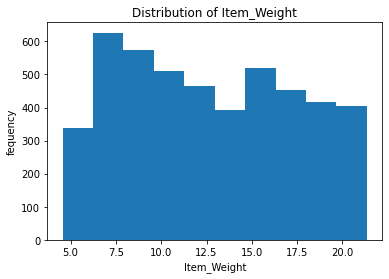

In [89]:
plt.hist(df['Item_Weight'])
plt.title('Distribution of Item_Weight')
plt.xlabel('Item_Weight')
plt.ylabel('fequency')
plt.show()

In [90]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].median())

In [91]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [92]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [93]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [94]:
df = df.drop('Item_Identifier', axis=1)

In [95]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [96]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [97]:
X1 = df.drop(['Item_Fat_Content','Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], axis=1)

# taking only columns needed for scaling

In [98]:
X1.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')

In [99]:
X1.dtypes

Item_Weight        float64
Item_Visibility    float64
Item_MRP           float64
dtype: object

In [100]:
X1.describe()

,Item_Weight,Item_Visibility,Item_MRP
count,5681.000000,5681.000000,5681.000000
mean,12.662023,0.065684,141.023273
std,4.245831,0.051252,61.809091
min,4.555000,0.000000,31.990000
25%,9.195000,0.027047,94.412000
50%,12.500000,0.054154,141.415400
75%,15.850000,0.093463,186.026600
max,21.350000,0.323637,266.588400


In [101]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [102]:
X1 = min_max_scaler.fit_transform(X1)

In [103]:
X1.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [104]:
X1 = pd.DataFrame(X1, columns=['Item_Weight', 'Item_Visibility', 'Item_MRP'])

In [105]:
X1.describe()

,Item_Weight,Item_Visibility,Item_MRP
count,5681.000000,5681.000000,5681.000000
mean,0.482705,0.202955,0.464766
std,0.252803,0.158364,0.263468
min,0.000000,0.000000,0.000000
25%,0.276273,0.083572,0.266080
50%,0.473057,0.167330,0.466437
75%,0.672522,0.288788,0.656597
max,1.000000,1.000000,1.000000


In [106]:
df = df.drop(['Item_Weight', 'Item_Visibility', 'Item_MRP'], axis=1)

In [107]:
df.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [108]:
X = pd.concat([df,X1], axis=1)

In [109]:
X.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Weight', 'Item_Visibility', 'Item_MRP'],
      dtype='object')

In [110]:
X.describe()

,Outlet_Establishment_Year,Item_Weight,Item_Visibility,Item_MRP
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,1997.828903,0.482705,0.202955,0.464766
std,8.372256,0.252803,0.158364,0.263468
min,1985.000000,0.000000,0.000000,0.000000
25%,1987.000000,0.276273,0.083572,0.266080
50%,1999.000000,0.473057,0.167330,0.466437
75%,2004.000000,0.672522,0.288788,0.656597
max,2009.000000,1.000000,1.000000,1.000000


In [111]:
#Label Encoding

In [112]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
X['Outlet_Identifier'] = label_encoder.fit_transform(X['Outlet_Identifier'])

In [113]:
X['Item_Type'] = label_encoder.fit_transform(X['Item_Type'])

In [114]:
X.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP
0,Low Fat,13,9,1999,Medium,Tier 1,Supermarket Type1,0.964275,0.023374,0.323413
1,reg,4,2,2007,Medium,Tier 2,Supermarket Type1,0.222983,0.118737,0.235849
2,Low Fat,11,0,1998,Medium,Tier 3,Grocery Store,0.598095,0.307674,0.894140
3,Low Fat,13,2,2007,Medium,Tier 2,Supermarket Type1,0.164335,0.047548,0.524488
4,Regular,4,5,1985,Medium,Tier 3,Supermarket Type3,0.473057,0.366458,0.862069


In [115]:
X.dtypes

Item_Fat_Content              object
Item_Type                      int32
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
dtype: object

In [116]:
X.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Weight', 'Item_Visibility', 'Item_MRP'],
      dtype='object')

In [117]:
X['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [118]:
# Item_Fat_Content
X.loc[X['Item_Fat_Content'] == "LF", 'Item_Fat_Content'] = 'Low Fat'

X.loc[X['Item_Fat_Content'] == "low fat", 'Item_Fat_Content'] = 'Low Fat'

X.loc[X['Item_Fat_Content'] == "reg", 'Item_Fat_Content'] = 'Regular'

In [119]:
X['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [120]:
#One Hot Encoding

In [121]:
X=pd.get_dummies(X)

In [122]:
X.head()

,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,13,9,1999,0.964275,0.023374,0.323413,1,0,0,1,0,1,0,0,0,1,0,0
1,4,2,2007,0.222983,0.118737,0.235849,0,1,0,1,0,0,1,0,0,1,0,0
2,11,0,1998,0.598095,0.307674,0.894140,1,0,0,1,0,0,0,1,1,0,0,0
3,13,2,2007,0.164335,0.047548,0.524488,1,0,0,1,0,0,1,0,0,1,0,0
4,4,5,1985,0.473057,0.366458,0.862069,0,1,0,1,0,0,0,1,0,0,0,1


In [123]:
X.columns

Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [124]:
X.shape

(5681, 18)

# Prediction using Random Forest Regressor

In [125]:
y_pred =  rf_reg.predict(X)

In [126]:
y_pred

array([1813.99945177, 1415.7197608 ,  674.17930455, ..., 1903.12200717,
       4751.90990904, 1439.58238389])

# Submission File

In [127]:
sub = pd.read_csv('sample_submission_8RXa3c6.csv', index_col='Item_Identifier')

In [128]:
sub

,Outlet_Identifier,Item_Outlet_Sales
Item_Identifier,,
FDW58,OUT049,1000
FDW14,OUT017,1000
NCN55,OUT010,1000
FDQ58,OUT017,1000
FDY38,OUT027,1000
...,...,...
FDB58,OUT046,1000
FDD47,OUT018,1000
NCO17,OUT045,1000


In [129]:
sub['Item_Outlet_Sales'] = y_pred

In [130]:
sub

,Outlet_Identifier,Item_Outlet_Sales
Item_Identifier,,
FDW58,OUT049,1813.999452
FDW14,OUT017,1415.719761
NCN55,OUT010,674.179305
FDQ58,OUT017,2358.448854
FDY38,OUT027,5953.782406
...,...,...
FDB58,OUT046,2279.260648
FDD47,OUT018,2709.680061
NCO17,OUT045,1903.122007


In [132]:
sub.to_csv('final_sub1.csv')